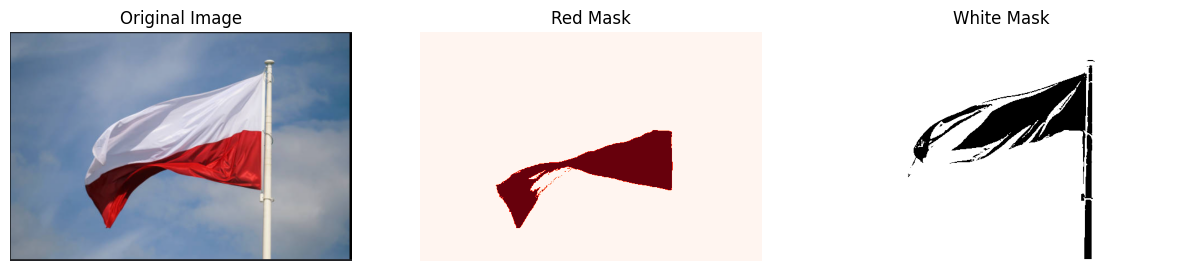

Poland


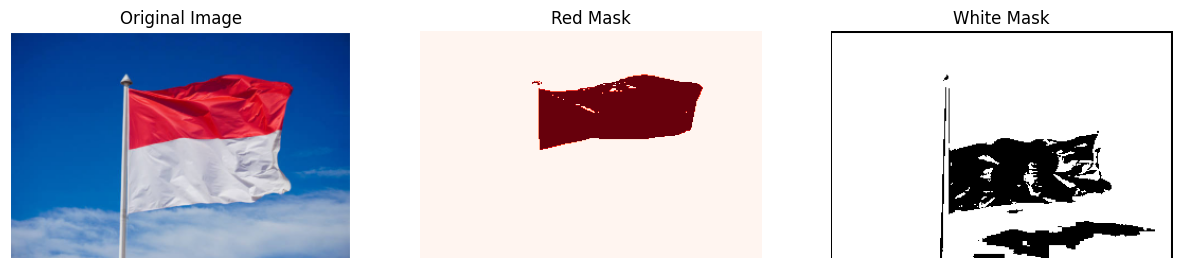

Indonesia


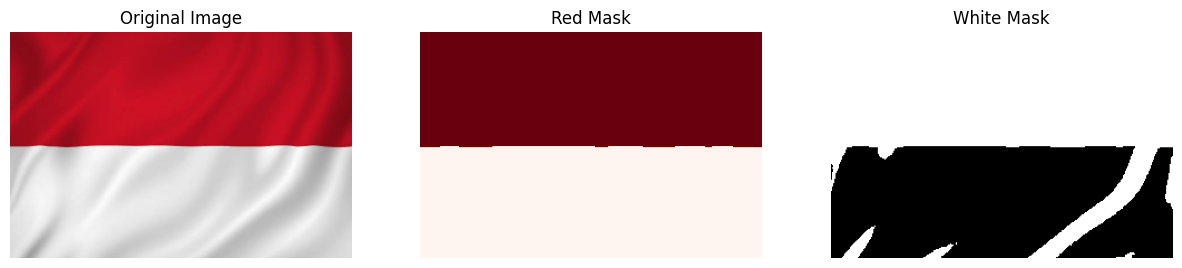

Indonesia


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def refine_flag_detection(image_path):
    # Load the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define HSV thresholds for red and white
    lower_red1 = np.array([0, 50, 50])
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([170, 50, 50])
    upper_red2 = np.array([180, 255, 255])
    lower_white = np.array([0, 0, 200])
    upper_white = np.array([180, 50, 255])

    # Create masks for red and white regions
    red_mask1 = cv2.inRange(image_hsv, lower_red1, upper_red1)
    red_mask2 = cv2.inRange(image_hsv, lower_red2, upper_red2)
    red_mask = cv2.bitwise_or(red_mask1, red_mask2)
    white_mask = cv2.inRange(image_hsv, lower_white, upper_white)

    # Detect contours for red and white regions
    contours_red, _ = cv2.findContours(red_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours_white, _ = cv2.findContours(white_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the largest red and white contours
    largest_red = max(contours_red, key=cv2.contourArea, default=None)
    largest_white = max(contours_white, key=cv2.contourArea, default=None)

    if largest_red is None or largest_white is None:
        return "Unknown: Flag regions not detected"

    # Get bounding boxes for the largest red and white regions
    red_box = cv2.boundingRect(largest_red)
    white_box = cv2.boundingRect(largest_white)

    # Ensure red is above white in Indonesia's flag and white is above red in Poland's flag
    red_y_center = red_box[1] + red_box[3] // 2  # Center Y-coordinate of red box
    white_y_center = white_box[1] + white_box[3] // 2  # Center Y-coordinate of white box

    if red_y_center < white_y_center:
        flag = "Indonesia"  # Red is above white
    else:
        flag = "Poland"  # White is above red

    # Draw bounding box on the original image
    output_image = image_rgb.copy()
    cv2.rectangle(output_image, (red_box[0], red_box[1]), (red_box[0] + red_box[2], red_box[1] + red_box[3]), (255, 0, 0), 3)
    cv2.rectangle(output_image, (white_box[0], white_box[1]), (white_box[0] + white_box[2], white_box[1] + white_box[3]), (0, 255, 0), 3)

    # Display the original image, masks, and result
    plt.figure(figsize=(15, 8))
    plt.subplot(1, 3, 1)
    plt.imshow(image_rgb)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(red_mask, cmap='Reds')
    plt.title("Red Mask")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(white_mask, cmap='Greys')
    plt.title("White Mask")
    plt.axis('off')

    plt.show()

    return flag

# Test the function with the uploaded image
refined_flag_result = refine_flag_detection(r"C:\Users\Vibha Narayan\OneDrive\Pictures\Screenshots\Poland Flag.png")
result1= refined_flag_result
print(result1)
refined_flag_result = refine_flag_detection(r"C:\Users\Vibha Narayan\OneDrive\Pictures\Screenshots\Indonesian Flag.png")
result2=refined_flag_result
print(result2)
refined_flag_result = refine_flag_detection(r"C:\Users\Vibha Narayan\OneDrive\Pictures\Screenshots\Indonesia Flag.png")
result3=refined_flag_result
print(result3)